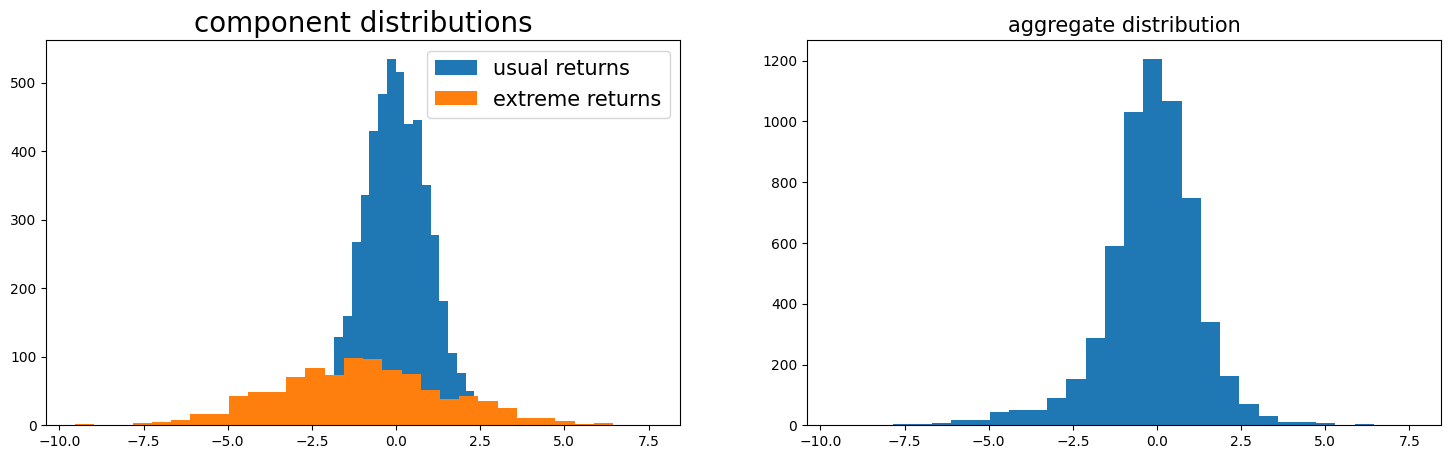

In [1]:
import numpy as np
from numpy.random import normal
import matplotlib.pyplot as plt

# create two normal distributions with difference variances

n_usual, n_extreme = 5000, 1000
usual = normal(loc=0.0, scale=1.0, size=(n_usual))
extreme = normal(loc=-1.0, scale=2.5, size=(n_extreme))

plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
plt.hist(usual,30, label='usual returns')
plt.hist(extreme,30, label='extreme returns')
plt.title("component distributions", fontsize=20)
plt.legend(fontsize=15)

aggregate = np.append(usual, extreme)
plt.subplot(1,2,2)
plt.hist(aggregate, 30)
plt.title("aggregate distribution", fontsize=15)
plt.show()

# distribution statistics

In [2]:
import pandas as pd
from scipy.stats import skew, kurtosis

def get_distrib_stats(x):
    return {"mean":np.mean(x),"sd":np.std(x),"skew":skew(x),"kurtosis":kurtosis(x)}

def compare_distrib_stats():
    xx = [get_distrib_stats(d) for d in [usual, extreme, aggregate]]
    return pd.DataFrame(xx, index=["usual", "extreme", "aggregate"])
          
compare_distrib_stats()

,mean,sd,skew,kurtosis
usual,-0.003075,0.997500,-0.008818,0.106626
extreme,-1.065921,2.546375,0.092111,-0.020784
aggregate,-0.180216,1.437615,-0.772698,3.527506


# Transition matrix between 'usual' and 'extreme' regime
$$
\begin{bmatrix}
p_{u,u} & p_{e,u}\\
p_{u,e} & p_{e,e}
\end{bmatrix}
$$

## determine the steady state percentages for each regime

$$
\begin{bmatrix}
p_{u}\\
p_{e}
\end{bmatrix} = 
\begin{bmatrix}
p_{u,u} & p_{e,u}\\
p_{u,e} & p_{e,e}
\end{bmatrix}
\begin{bmatrix}
p_{u}\\
p_{e}
\end{bmatrix}
$$

In [3]:
trans = np.array([[.9,.1],[.8,.2]]).T
print("transition matrix between the two states")
display(pd.DataFrame(trans, columns=["start usual","start extreme"], index=["end usual","end extreme"]))

print("steady state after many iterations")
x = np.array([.3,.7])   # arbitrary starting probabilities for 'usual' and 'extreme' regimes
for  _ in range(10000):
    x = trans.dot(x)    
print(f"probabilities in 'usual' and 'extreme' regimes: {x}")

transition matrix between the two states


,start usual,start extreme
end usual,0.9,0.8
end extreme,0.1,0.2


steady state after many iterations
probabilities in 'usual' and 'extreme' regimes: [0.88888889 0.11111111]


# solving the steady state probabilities using PCA

$$\lambda
\begin{bmatrix}
p_{u}\\
p_{e}
\end{bmatrix} = 
\begin{bmatrix}
p_{u,u} & p_{e,u}\\
p_{u,e} & p_{e,e}
\end{bmatrix}
\begin{bmatrix}
p_{u}\\
p_{e}
\end{bmatrix}
$$

where $\lambda= 1$

In [4]:
from numpy.linalg import eig  # use eig function since matrix is not symmetric

values, vectors = eig(trans)
print("eigenvalues", values, '\n\neigenvectors\n', vectors.T, '\n\n')

unit_eigenvalue = [i for i,v in enumerate(values) if v == 1][0]
print("number of unit eigenvalue :",unit_eigenvalue)

steady_state = vectors.T[unit_eigenvalue] / sum(vectors.T[unit_eigenvalue])
print(f"steady state probabilities for 'usual' and 'extreme' states = {steady_state}")

eigenvalues [1.  0.1] 

eigenvectors
 [[ 0.99227788  0.12403473]
 [-0.70710678  0.70710678]] 


number of unit eigenvalue : 0
steady state probabilities for 'usual' and 'extreme' states = [0.88888889 0.11111111]


# solving for the steady state algebraically
$$
\begin{bmatrix}
p_{u}\\
p_{e}
\end{bmatrix} = 
\begin{bmatrix}
p_{u,u} & p_{e,u}\\
p_{u,e} & p_{e,e}
\end{bmatrix}
\begin{bmatrix}
p_{u}\\
p_{e}
\end{bmatrix}
$$

$$
\frac{p_u}{p_e} = \frac{p_{e,u}}{ p_{u,e}}
$$

In [5]:
steady_state = np.array([trans[0][1], trans[1][0]]) /(trans[0][1] + trans[1][0])
print(f"\nsteady state = {steady_state}")


steady state = [0.88888889 0.11111111]


# create aggregate distribution from regime switching model

In [6]:
total_samples = 10000
n_usual, n_extreme = [int(x) for x in steady_state * total_samples]
usual = normal(loc=0.0, scale=1.0, size=(n_usual))
extreme = normal(loc=0.0, scale=2.5, size=(n_extreme))
aggregate = np.append(usual, extreme)

compare_distrib_stats()

,mean,sd,skew,kurtosis
usual,-0.001931,1.008094,0.064224,0.050959
extreme,0.068398,2.485190,0.014397,-0.156930
aggregate,0.005883,1.260978,0.095055,2.881981
